<a href="https://colab.research.google.com/github/SergiySpv/ney_m22/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна 5

з дисципліни "Нейроні мережі"

студента групи кн-31

Сопова Сергія

імпорт zip

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-22 15:10:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.128, 108.177.121.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   117MB/s    in 13s     

2022-05-22 15:10:51 (117 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



Перевірка вмісту папки


In [2]:
!ls 101_food_classes_10_percent

test  train



Вибір класів

In [3]:
import pathlib
import numpy as np
data_dir = pathlib.Path("101_food_classes_10_percent/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
my_class_names = [class_names[10], class_names[40], class_names[70]]
print(my_class_names)

['bruschetta', 'french_fries', 'pad_thai']


Фунція виводу зображення

Image shape: (512, 384, 3)


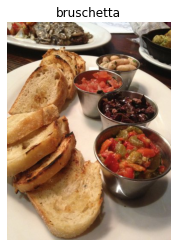

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class


  random_image = random.sample(os.listdir(target_folder), 1)

 
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") 

  return img
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class=my_class_names[0])

Image shape: (512, 512, 3)


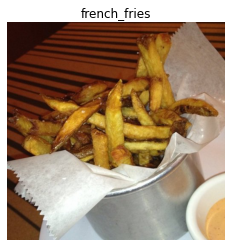

In [6]:
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class=my_class_names[1])

Image shape: (512, 512, 3)


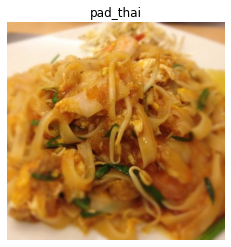

In [7]:
img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class=my_class_names[2])

Фільтрування даних, залишення лише відповідно варіанту

In [8]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

from pathlib import Path
import shutil

for i in class_names:
  if i not in my_class_names:
    dirpath = Path(train_dir) / i
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)
    dirpath = Path(test_dir) / i
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath) 
!ls 101_food_classes_10_percent/train/
!ls 101_food_classes_10_percent/test/

bruschetta  french_fries  pad_thai
bruschetta  french_fries  pad_thai


Імпортування даних з каталогів і перетворення їх на пакети

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(test_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')


Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


Навчання мережі

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_model = model.fit(train_data_augmented,
                          epochs=40,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/40
24/24 [==============================] - 62s 3s/step - loss: 1.1171 - accuracy: 0.4707 - val_loss: 0.9722 - val_accuracy: 0.4978
Epoch 2/40
24/24 [==============================] - 67s 3s/step - loss: 0.9544 - accuracy: 0.5600 - val_loss: 0.8884 - val_accuracy: 0.5867
Epoch 3/40
24/24 [==============================] - 51s 2s/step - loss: 0.8994 - accuracy: 0.6067 - val_loss: 0.8789 - val_accuracy: 0.5733
Epoch 4/40
24/24 [==============================] - 50s 2s/step - loss: 0.9002 - accuracy: 0.5827 - val_loss: 0.9072 - val_accuracy: 0.6222
Epoch 5/40
24/24 [==============================] - 50s 2s/step - loss: 0.8139 - accuracy: 0.6627 - val_loss: 0.8549 - val_accuracy: 0.6133
Epoch 6/40
24/24 [==============================] - 50s 2s/step - loss: 0.8104 - accuracy: 0.6280 - val_loss: 0.9792 - val_accuracy: 0.5600
Epoch 7/40
24/24 [==============================] - 50s 2s/step - loss: 0.8072 - accuracy: 0.6653 - val_loss: 0.7854 - val_accuracy: 0.6400
Epoch 8/40
24/24 [==

Зображення точночності і втрат

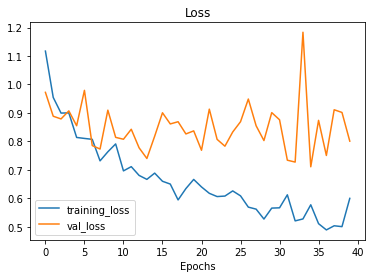

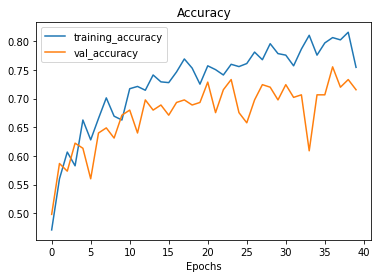

In [11]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
plot_loss_curves(history_model)